In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Get the current notebook's directory
notebook_dir = os.getcwd()  # current working directory

# Assume 'ml' folder is in the repo root, one level up from notebooks/
repo_root = os.path.abspath(os.path.join(notebook_dir, ".."))

# Add repo root to Python path if not already there
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

Knn is a simple, non-parametric, instance-based learning algorithm. It makes predictions based on the majority class of the nearest neighbors.



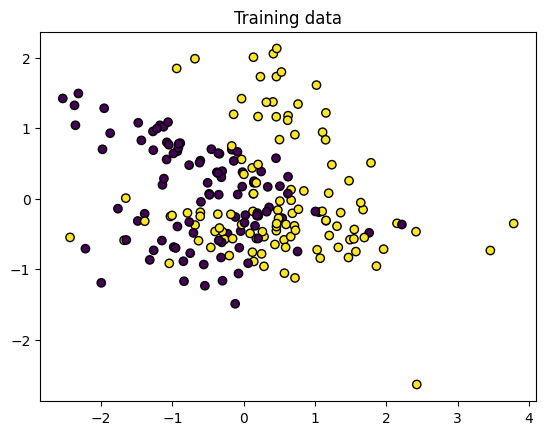

In [2]:
from ml.models.knn import KNNClassifier
from data.load_data import load_synthetic_classification
from ml.evaluation import accuracy_score, precision, recall, f1

# Let's load a dataset with 2 features, so we can visualize it.
X,  y = load_synthetic_classification(n_samples=300, n_features=2, n_classes=2, class_sep=0.5, random_state=1)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Let's visualize the dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
plt.title("Training data")
plt.show()

In [3]:
# Train the knn classifier
k = 5
clf = KNNClassifier(k=k, metric="euclidean")
clf.fit(X_train, y_train)

# We use the classifier to make predictions
y_pred = clf.predict(X_test)

In [4]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

p = precision(y_test, y_pred)
r = recall(y_test, y_pred)
f = f1(y_test, y_pred)
print(f"Recall: {r}, Precision: {p} and F1: {f}.")

Accuracy:  0.7333333333333333
Recall: 0.7692307692307693, Precision: 0.6666666666666666 and F1: 0.3571428571428571.


To plot the decision boundary plot:
1. We create a grid of points. We have to take min/max of both feature dimensions and create a dense grid.
2. Predict each grid point. Flatten the grid and pass all coordinates to clf.predict.
3. With plt.countourf paint the grid by predicted class.

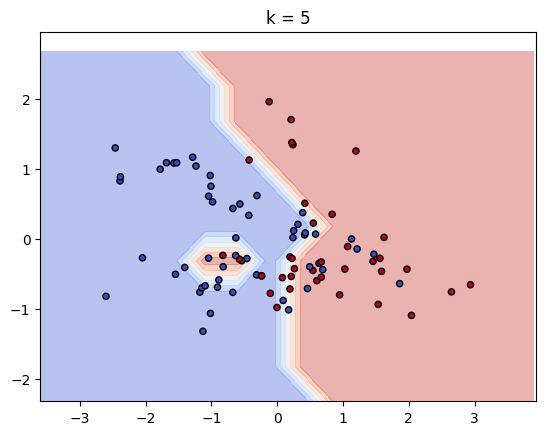

In [5]:
def plot_decision_boundaries(clf, X, y, resolution=0.5, ax=None):
    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, resolution),
        np.arange(y_min, y_max, resolution)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.predict(grid).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4, cmap="coolwarm")
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor="k", s=20)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title(f"k = {clf.k}")


plot_decision_boundaries(clf, X_test, y_test)

What happens if we increase k?

With the same example, let's compare different values of k.

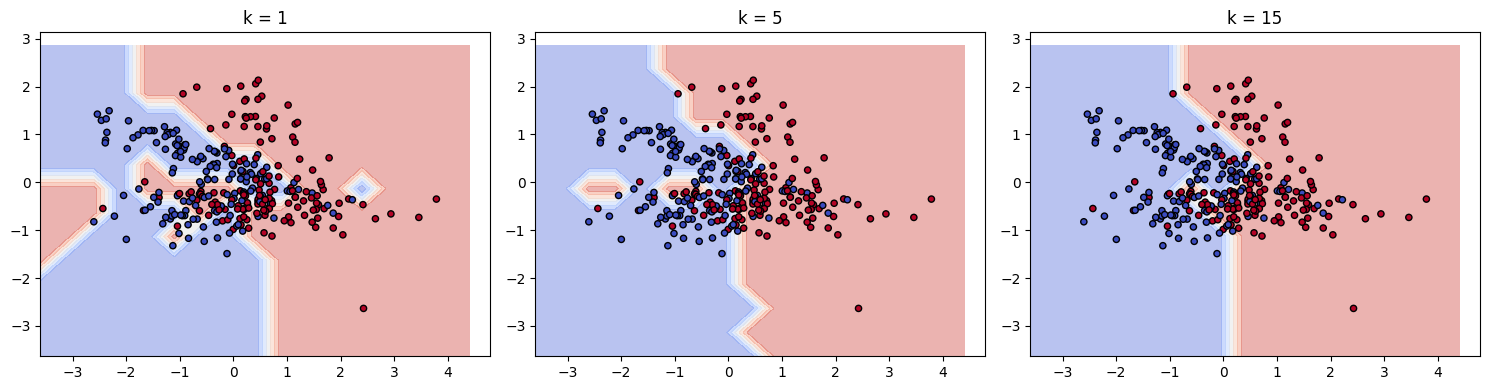

In [6]:
ks = [1, 5, 15]
fig, axes = plt.subplots(1, len(ks), figsize=(15, 4))

for ax, k in zip(axes, ks):
    clf = KNNClassifier(k=k, metric="euclidean")
    clf.fit(X_train, y_train)
    plot_decision_boundaries(clf, X, y, ax=ax)

plt.tight_layout()
plt.show()


When k is small relative to the dataset, we can see noisy boundaries (overfitting)

As k grows, the curve smooths and some noise is removed. But if k is too big, the model may be start ingoring small clusters(underfiting.)

**How does KNN behaves if classes are imbalanced?**

KNN is a majority-vote algorithm: it predicts the class that is most frequent among the k nearest neighbors. If the dataset is imbalanced, this can cause problems.

For example: If we have 95 points of class A and 5 of class B. Even if a test point is close to class B points, its k nearest neighbors migh mosly be class A. KNN biases towards the majority class.

Solution:
- Oversample minority class or undersample majority class.
- Give closer neighbors more weight. Distance-weighted KNN.
- Smaller k can reduce majority class domination locally, but increases variance.


**Why KNN gets slower as the dataset grows?**

KNN is lazy learning, meaning that training is almost free (it just stores the dataset). But prediction is expensive, for each test point, KNN computes the distance to every training point. To all of that we have to add the final sort to find k nearest neighbors.

So as the datasets grows, predictions becomes very slow.

Solutions:
- Approximate nearest neighbors
- Reduce features via PCA to lower distance computation cost.
- Use trees to partition the space and avoid computing distances to every point.